# Assessing feature performance

DWPC = 0.4, computed on a subset of non-indications

In [1]:
import re

import matplotlib.pyplot
import pandas
import mpld3
import mpld3.plugins
import seaborn

%matplotlib inline

/home/mmayers/software/anaconda3/envs/integrate/lib/python3.5/site-packages/ipykernel/pylab/config.py:66: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  inline backend."""
/home/mmayers/software/anaconda3/envs/integrate/lib/python3.5/site-packages/ipykernel/pylab/config.py:71: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  'retina', 'jpeg', 'svg', 'pdf'.""")
/home/mmayers/software/anaconda3/envs/integrate/lib/python3.5/site-packages/ipykernel/pylab/config.py:85: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  use `figure_formats` instead)""")
/home/mmayers/software/anaconda3/envs/integrate/lib/python3.5/site-package

In [2]:
auroc_df = pandas.read_table('data/feature-performance/auroc.tsv')
metapath_df = pandas.read_table('data/metapaths.tsv')
metapath_df = metapath_df.rename(columns={'abbreviation': 'metapath'})[['metapath', 'length']]
auroc_df = auroc_df.merge(metapath_df)
auroc_df.head(2)

/home/mmayers/software/anaconda3/envs/integrate/lib/python3.5/site-packages/IPython/core/formatters.py:92: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
/home/mmayers/software/anaconda3/envs/integrate/lib/python3.5/site-packages/IPython/core/formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


,metapath,dwpc_auroc,pdwpc_auroc,rdwpc_auroc,nonzero,pdwpc_primary_auroc,delta_auroc,pval_delta_auroc,length
0,C<hpCduftD,0.50034,0.49996,0.50038,0.000135,0.50000,0.000341,9.261700e-08,2
1,C<hpCduftDduftCduftD,0.50029,0.50000,0.50029,0.000202,0.50002,0.000273,2.113100e-04,4


In [5]:
auroc_df.sort_values('delta_auroc', ascending=False).head()

,metapath,dwpc_auroc,pdwpc_auroc,rdwpc_auroc,nonzero,pdwpc_primary_auroc,delta_auroc,pval_delta_auroc,length
15,CduftDduftCduftD,0.82804,0.76269,0.79249,0.188140,0.59070,0.237340,8.420000e-09,3
24,CduftDso>D<soD,0.61272,0.51820,0.60223,0.058942,0.50151,0.111210,6.375100e-09,3
27,CduftDso>DduftCduftD,0.62563,0.64144,0.54989,0.078006,0.52600,0.099632,3.766000e-06,4
9,CduftD<soDduftCduftD,0.60730,0.63098,0.52860,0.065881,0.52625,0.081050,4.861700e-07,4
43,CpiwPpiwCduftD,0.59550,0.55235,0.59479,0.045605,0.51587,0.079624,1.925700e-09,3


In [12]:
# auroc_df['delta_permuted_auroc'] = auroc_df.pdwpc_auroc - auroc_df.pdwpc_primary_auroc
# auroc_df.sort_values('pdwpc_primary_auroc', ascending=False)

In [13]:
#auroc_df.sort_values('delta_permuted_auroc', ascending=False)

## Performance by path length

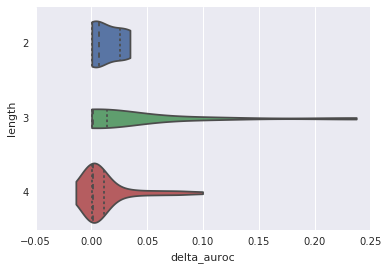

In [3]:
ax = seaborn.violinplot(x='delta_auroc', y='length', data=auroc_df, cut=0, orient='h', inner='quartile')

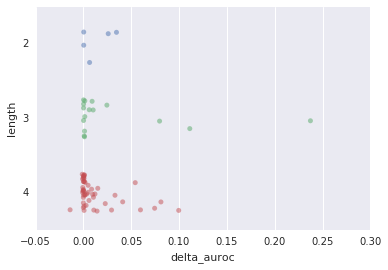

In [4]:
ax = seaborn.stripplot(x='delta_auroc', y='length', data=auroc_df, jitter=0.25, orient='h', alpha = 0.5)

## Feature AUROC versus non-zero fraction

In [6]:
grid = seaborn.jointplot('nonzero', 'dwpc_auroc', data=auroc_df, joint_kws={'alpha': 0.5})
points = grid.ax_joint.collections[0]
labels = auroc_df.metapath.tolist()
tooltip = mpld3.plugins.PointLabelTooltip(points, labels)
mpld3.plugins.connect(grid.fig, tooltip)
mpld3.display()

## Delta AUROC versus non-zero fraction

In [7]:
grid = seaborn.jointplot('nonzero', 'delta_auroc', data=auroc_df, joint_kws={'alpha': 0.5})
points = grid.ax_joint.collections[0]
labels = auroc_df.metapath.tolist()
tooltip = mpld3.plugins.PointLabelTooltip(points, labels)
mpld3.plugins.connect(grid.fig, tooltip)
mpld3.display()

## Delta-AUROC versus AUROC

In [8]:
grid = seaborn.jointplot('dwpc_auroc', 'delta_auroc', data=auroc_df, joint_kws={'alpha': 0.5})
points = grid.ax_joint.collections[0]
labels = auroc_df.apply(lambda x: '{}: {:.1%} nonzero'.format(x['metapath'], x['nonzero']), axis=1).tolist()
tooltip = mpld3.plugins.PointLabelTooltip(points, labels)
mpld3.plugins.connect(grid.fig, tooltip)
mpld3.display()

## Performance by Metaedge

In [9]:
metaedge_df = pandas.read_table('data/metaedge-in-metapath.tsv')
#metaedge_df = metaedge_df.rename(columns={'metapath': 'feature'})
metaedge_df = metaedge_df[['metapath', 'metaedge', 'metaedge_abbrev', 'position']]
metaedge_df = metaedge_df.merge(auroc_df)
metaedge_df.head(2)

,metapath,metaedge,metaedge_abbrev,position,dwpc_auroc,pdwpc_auroc,rdwpc_auroc,nonzero,pdwpc_primary_auroc,delta_auroc,pval_delta_auroc,length
0,C<hpCduftD,Compound > has-part > Compound,ChpC,1,0.50034,0.49996,0.50038,0.000135,0.5,0.000341,9.261700e-08,2
1,C<hpCduftD,Disease - drug-used-for-treatment - Compound,DduftC,2,0.50034,0.49996,0.50038,0.000135,0.5,0.000341,9.261700e-08,2


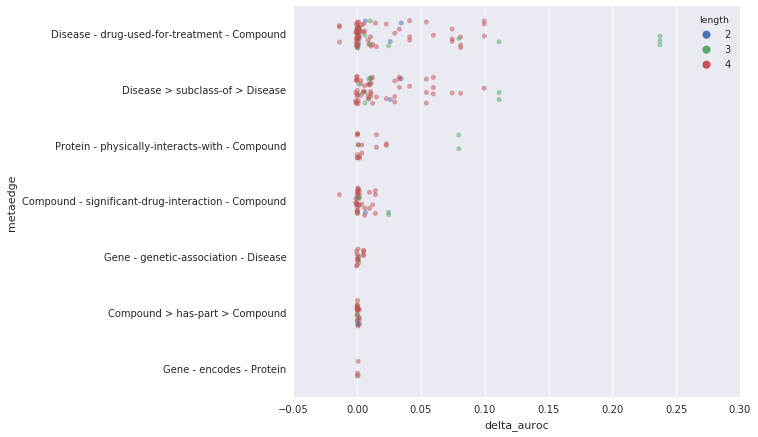

In [10]:
matplotlib.pyplot.figure(figsize=(8, 7))
metasort_df = metaedge_df.sort_values(['delta_auroc', 'metaedge'], ascending=[False, True])
order = metasort_df.drop_duplicates('metaedge').metaedge
ax = seaborn.stripplot(
    x='delta_auroc', y='metaedge', data=metasort_df, jitter=0.25,
    hue='length', orient='h', alpha = 0.5, order=order)